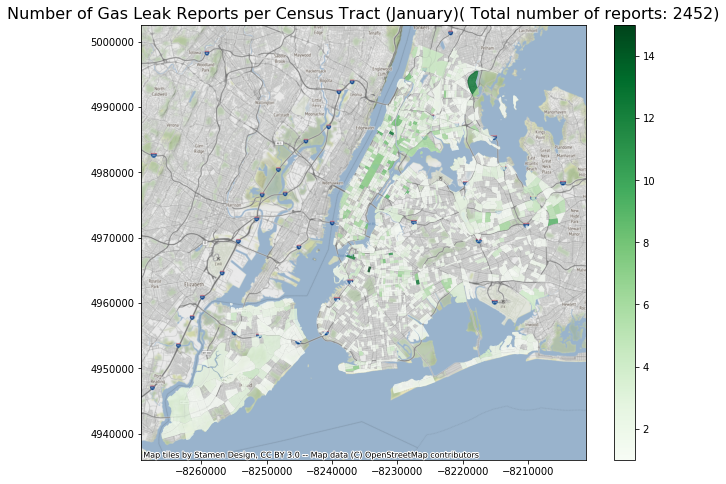

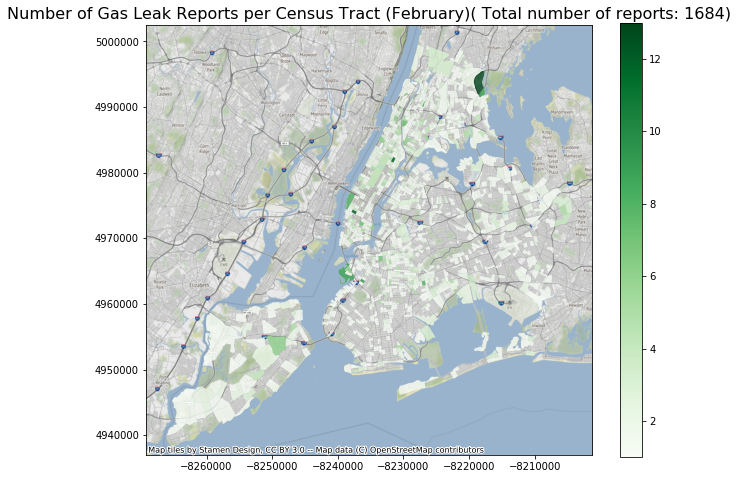

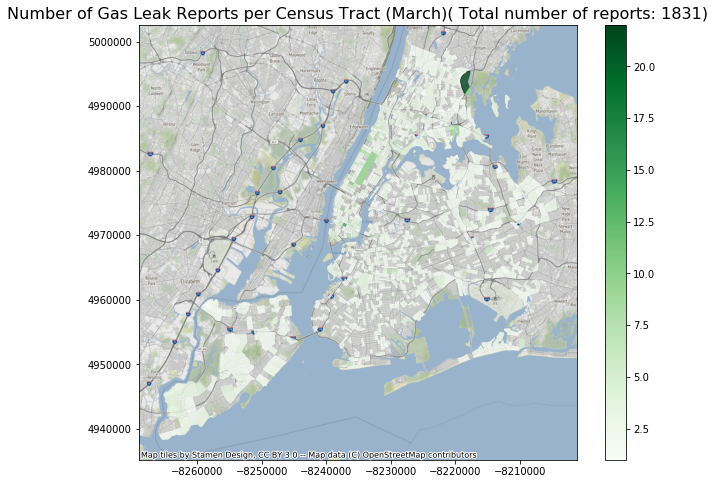

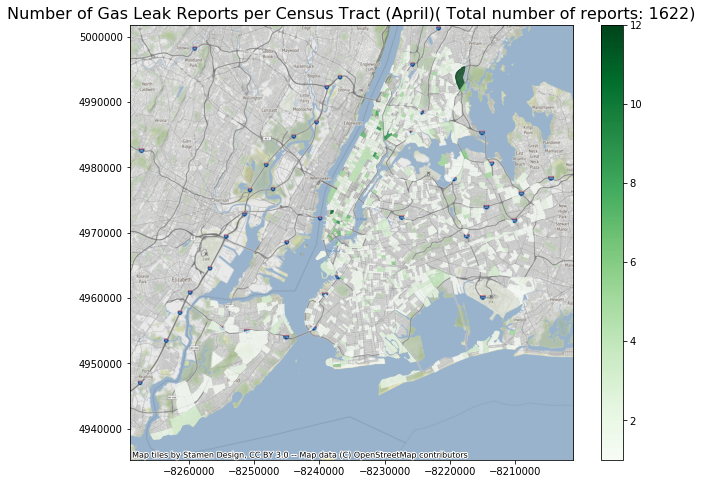

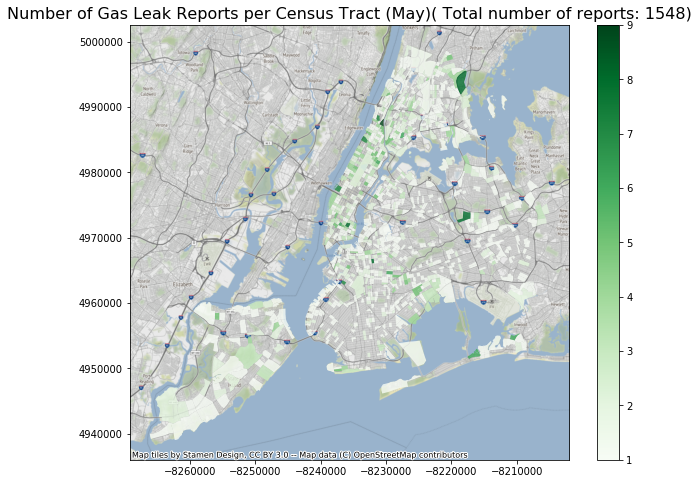

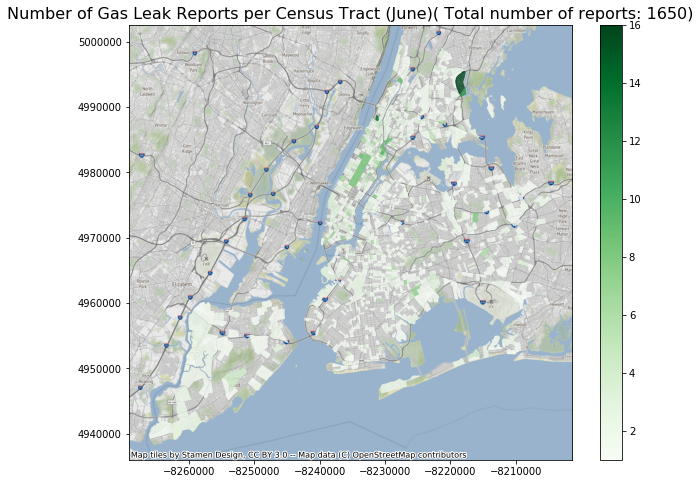

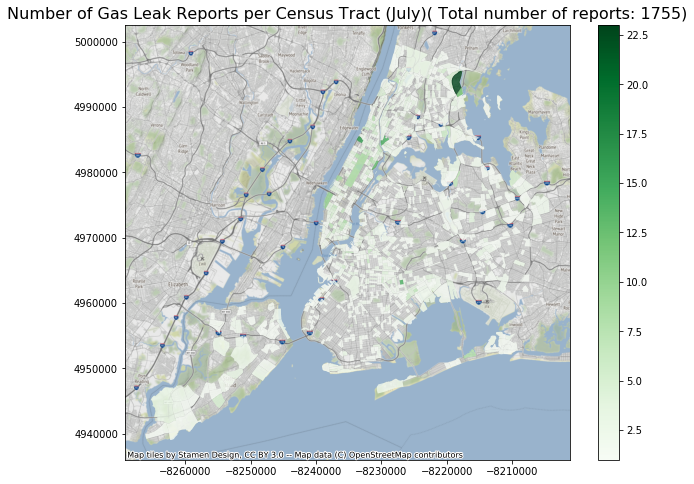

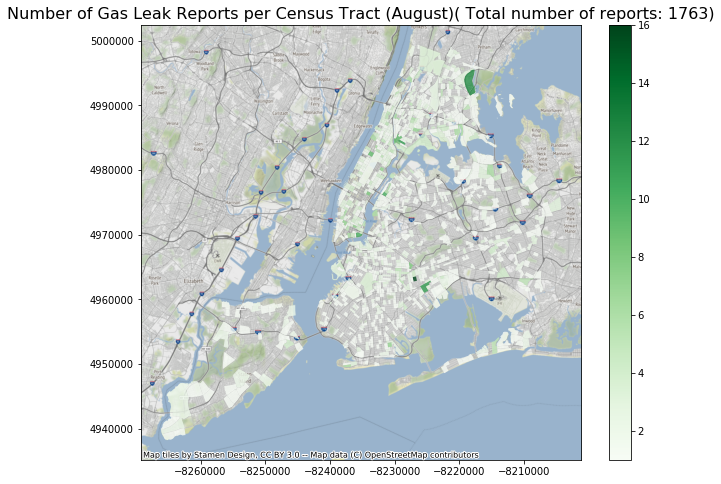

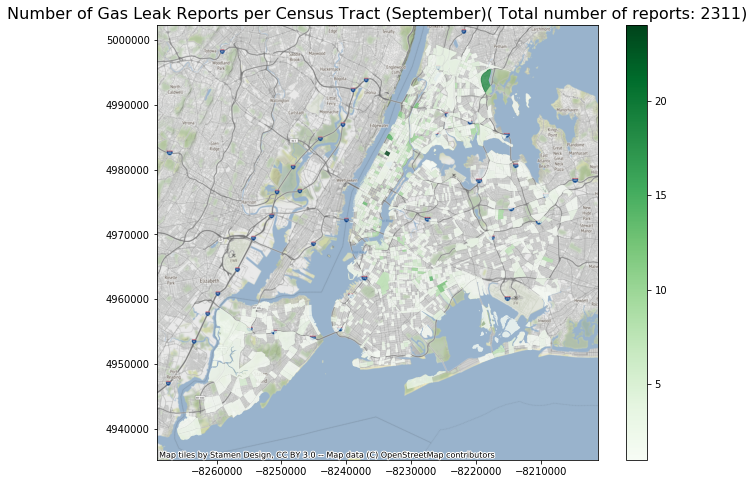

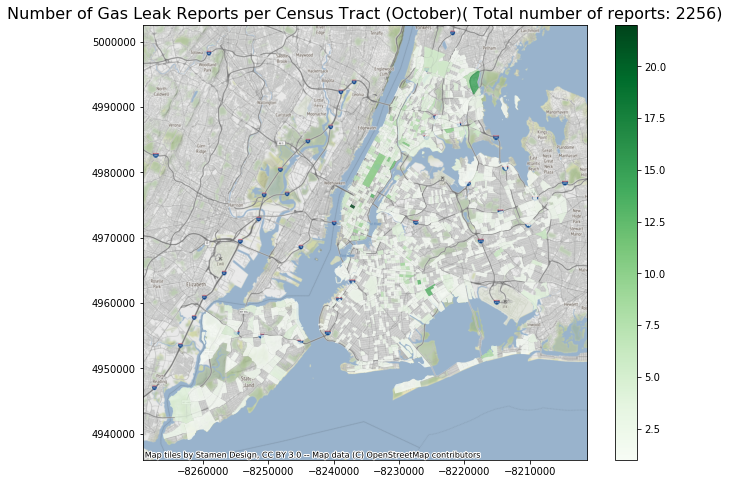

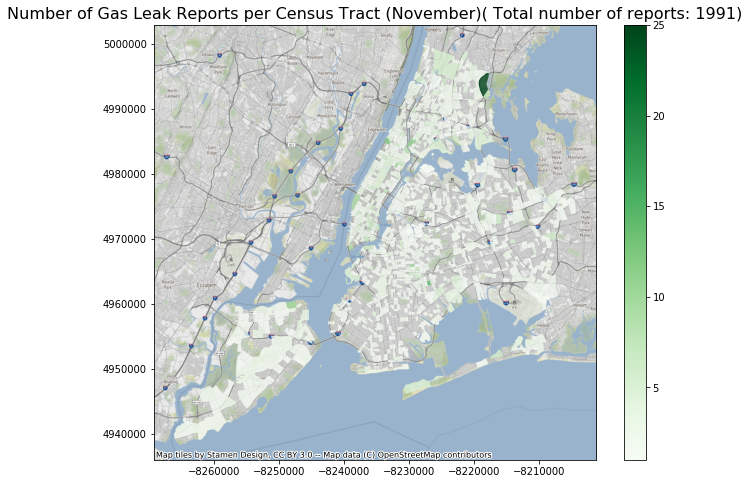

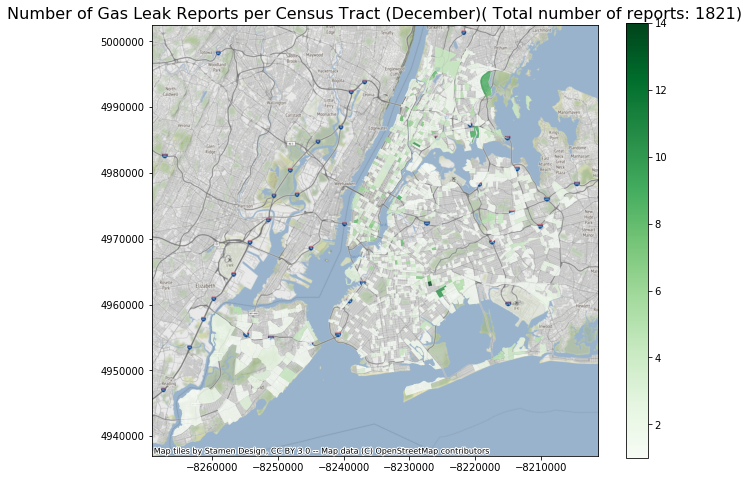

In [3]:
import os
import pandas as pd
import geopandas as gpd
import platform
import matplotlib.pyplot as plt
import contextily as ctx

#shp_file = 'tl_2019_36_tract/tl_2019_36_tract.shp'
shp_file = 'nyu_2451_34505/nyu_2451_34505.shp'
#shp_file = 'NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp'
csvfile = 'Geoid_Count2018.csv'
us_tract = gpd.read_file(shp_file)
data = pd.read_csv(csvfile)


Month = ['01','02','03','04','05','06','07','08','09','10','11','12']
Month_word = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    Month_data = pd.DataFrame(columns = ['Time','Geoid','NumberOfReports']) # create a new Dataframe with each month
    for row in range(0,len(data)):
        if data.iat[row,0][0:2] == Month[i]:    
            Month_data = Month_data.append({'Time' : data.iat[row,0], 'Geoid' : data.iat[row,1],  'NumberOfReports': data.iat[row,2] } , ignore_index=True)


    us_tract['Geoid'] = us_tract['tractid'].str.upper()              # create a new column of the same name as DF from 'NAME'
                                                                    # In shp file, the "NAME" is the census tract
                                                                    # In shp file, the "tractid" is the geoid
    us_tract['Geoid'] = us_tract.Geoid.astype(float)        # Conver type to float so we can merge the DFs
                                                                 # We use merge to pass in the data(NumOfReports)from the csv
    Month_data['Geoid'] = Month_data.Geoid.astype(float)
    Month_data['NumberOfReports'] = Month_data.NumberOfReports.astype(int)
    join = us_tract.merge(Month_data, on='Geoid')
    Total = join['NumberOfReports'].sum()


    #plot with background map
    df = join.to_crs(epsg=3857) 
    ax = df.plot(column='NumberOfReports',cmap='Greens',figsize = (10,8),alpha = 0.8,legend = True)
    ax.set_title(label = 'Number of Gas Leak Reports per Census Tract (' + Month_word[i] + ')' + '( Total number of reports: '+ str(Total)+')', fontdict={'fontsize': 16}, loc='center')
    ctx.add_basemap(ax,zoom = 12)


In [12]:
for i in range(0,12):
    Month_data = pd.DataFrame(columns = ['Time','Geoid','NumberOfReports']) # create a new Dataframe with each month
    for row in range(0,len(data)):
        if data.iat[row,0][0:2] == Month[i]:    
            Month_data = Month_data.append({'Time' : data.iat[row,0], 'Geoid' : data.iat[row,1],  'NumberOfReports': data.iat[row,2] } , ignore_index=True)

    for row in range(0,len(Month_data)):
        if Month_data.iat[row,2] >= 5:
            print(Month_data.loc[[row]])
            
            
# The one on top corner of bronx is 36005046201  (186 total point)
# The one on the right-mid section of brooklyn is very small: 36047091000 (131 total points)
#                               (super highlighted for December)

      Time        Geoid NumberOfReports
1  01/2018  36005016300               5
      Time        Geoid NumberOfReports
3  01/2018  36047016300              15
      Time        Geoid NumberOfReports
5  01/2018  36047090800               7
      Time        Geoid NumberOfReports
7  01/2018  36047122000               6
      Time        Geoid NumberOfReports
8  01/2018  36081006300               7
       Time        Geoid NumberOfReports
16  01/2018  36005022902               6
       Time        Geoid NumberOfReports
17  01/2018  36061022400               8
       Time        Geoid NumberOfReports
30  01/2018  36047088000               5
       Time        Geoid NumberOfReports
33  01/2018  36081157101               5
       Time        Geoid NumberOfReports
35  01/2018  36081122701               6
       Time        Geoid NumberOfReports
39  01/2018  36005007500               5
       Time        Geoid NumberOfReports
40  01/2018  36005046201              13
       Time        Geoid N

      Time        Geoid NumberOfReports
7  03/2018  36061019100               7
       Time        Geoid NumberOfReports
11  03/2018  36061014300               9
       Time        Geoid NumberOfReports
18  03/2018  36005046201              22
       Time        Geoid NumberOfReports
24  03/2018  36005014701               6
       Time        Geoid NumberOfReports
28  03/2018  36005013300               8
       Time        Geoid NumberOfReports
31  03/2018  36047032600               6
       Time        Geoid NumberOfReports
33  03/2018  36005017702               5
       Time        Geoid NumberOfReports
35  03/2018  36061007200               7
       Time        Geoid NumberOfReports
37  03/2018  36005021601               6
       Time        Geoid NumberOfReports
39  03/2018  36005030200              10
       Time        Geoid NumberOfReports
41  03/2018  36005009000               9
       Time        Geoid NumberOfReports
45  03/2018  36081101001               5
       Time       

       Time        Geoid NumberOfReports
12  06/2018  36061013600               6
       Time        Geoid NumberOfReports
13  06/2018  36061015100               6
       Time        Geoid NumberOfReports
14  06/2018  36061017000               6
       Time        Geoid NumberOfReports
22  06/2018  36005002000               5
       Time        Geoid NumberOfReports
25  06/2018  36061021200               5
       Time        Geoid NumberOfReports
26  06/2018  36005046201              16
       Time        Geoid NumberOfReports
27  06/2018  36047110400               7
       Time        Geoid NumberOfReports
28  06/2018  36061024200               9
       Time        Geoid NumberOfReports
30  06/2018  36061018900               9
       Time        Geoid NumberOfReports
59  06/2018  36061006400               6
       Time        Geoid NumberOfReports
64  06/2018  36005002500               5
       Time        Geoid NumberOfReports
65  06/2018  36047037900               6
       Time     

        Time        Geoid NumberOfReports
533  07/2018  36061023501               6
        Time        Geoid NumberOfReports
566  07/2018  36061021800               6
      Time        Geoid NumberOfReports
1  08/2018  36061002400               5
      Time        Geoid NumberOfReports
3  08/2018  36047034200               6
      Time        Geoid NumberOfReports
5  08/2018  36061021600               5
       Time        Geoid NumberOfReports
10  08/2018  36005012901               7
       Time        Geoid NumberOfReports
11  08/2018  36061025100               5
       Time        Geoid NumberOfReports
13  08/2018  36061007100               6
       Time        Geoid NumberOfReports
25  08/2018  36047091000              16
       Time        Geoid NumberOfReports
29  08/2018  36061024500               5
       Time        Geoid NumberOfReports
31  08/2018  36005013300               7
       Time        Geoid NumberOfReports
36  08/2018  36005026602               5
       Time       

297  09/2018  36005014500               7
        Time        Geoid NumberOfReports
301  09/2018  36047012700               5
        Time        Geoid NumberOfReports
333  09/2018  36081002500               9
        Time        Geoid NumberOfReports
341  09/2018  36061013600               7
        Time        Geoid NumberOfReports
344  09/2018  36061016600               6
        Time        Geoid NumberOfReports
351  09/2018  36047115600               6
        Time        Geoid NumberOfReports
363  09/2018  36061014602               7
        Time        Geoid NumberOfReports
365  09/2018  36061007400               6
        Time        Geoid NumberOfReports
366  09/2018  36061002201               8
        Time        Geoid NumberOfReports
369  09/2018  36061026100               6
        Time        Geoid NumberOfReports
371  09/2018  36005040800               5
        Time        Geoid NumberOfReports
382  09/2018  36061006300               5
        Time        Geoid NumberOf

418  10/2018  36005039300               7
        Time        Geoid NumberOfReports
421  10/2018  36047035900               6
        Time        Geoid NumberOfReports
423  10/2018  36047115600               6
        Time        Geoid NumberOfReports
443  10/2018  36005016600               5
        Time        Geoid NumberOfReports
478  10/2018  36005018500               7
        Time        Geoid NumberOfReports
479  10/2018  36061022600               6
        Time        Geoid NumberOfReports
482  10/2018  36005038301               7
        Time        Geoid NumberOfReports
491  10/2018  36061015700               6
        Time        Geoid NumberOfReports
500  10/2018  36005009000               5
        Time        Geoid NumberOfReports
514  10/2018  36005046202               7
        Time        Geoid NumberOfReports
526  10/2018  36061017401               5
        Time        Geoid NumberOfReports
543  10/2018  36061023200               5
        Time        Geoid NumberOf

259  12/2018  36005020501               5
        Time        Geoid NumberOfReports
267  12/2018  36047012700               6
        Time        Geoid NumberOfReports
268  12/2018  36005018900               6
        Time        Geoid NumberOfReports
270  12/2018  36081080900               5
        Time        Geoid NumberOfReports
305  12/2018  36005020000               5
        Time        Geoid NumberOfReports
308  12/2018  36061021100               6
        Time        Geoid NumberOfReports
322  12/2018  36081103201               5
        Time        Geoid NumberOfReports
326  12/2018  36061006700               8
        Time        Geoid NumberOfReports
345  12/2018  36061017500               5
        Time        Geoid NumberOfReports
350  12/2018  36061030900               5
        Time        Geoid NumberOfReports
361  12/2018  36061026100               7
        Time        Geoid NumberOfReports
408  12/2018  36061006500               5
        Time        Geoid NumberOf

In [29]:
vertify = gpd.read_file(shp_file)
vertify['Geoid'] = vertify['tractid'].str.upper()
vertify['Geoid'] = vertify.Geoid.astype(int)
#data['Geoid'] = data.Geoid.astype(float)
data['NumberOfReports'] = data.NumberOfReports.astype(int)
test = vertify.merge(data, on='Geoid')
count = 0
count2 = 0
for row in range(0,len(test)):
    if test.at[row,'Geoid'] == 36005046201:
        count += test.at[row,'NumberOfReports']
    elif test.at[row,'Geoid'] == 36047091000:
        count2 += test.at[row,'NumberOfReports']
        
print(count)
print(count2)


186
131
